# Capstone: Telemarketing Success

## Summary
The dataset of interest contains information regarding the success rate of direct telemarketing phone calls made by a Portuguese banking institution, promoting long-term deposits.


The database was found from the UCI Machine Learning Repository, but originally found from a 2014 study.
1. Title: Bank Marketing (with social/economic context)
2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
        [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
The data is enriched by the inclusion of five new social and economic features indicative of the nation and published by the Banco de Portugal. Publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in the study conducted by Moro et al.

## Problem:
Can a Machine Learning model predict which clients are most-likely to positively engage in telemarketing calls?
- improve the telemarketing campaign of a banking institution via more accurate client targeting/ efficent channeling of marketing resources?

rough:
It is essential for banks to optimize marketing strateiges and improve effectivenss. Understanding customer needs leads to more effective campaigns, smarter product design and greater overall customer satisfaction. The main objective is to increase the effectiveness and efficiency of the banks telemarketing camapign.
This project should enable banks to develop a more granular understanding of the customer base and predict their customers reposne to their telemarketing campaign. This is done by analysing client features to identify which type of customer is more likely to respond positively to the camapign and subscribe to long-term deposits.

## Explore Available Datasets (4)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%pylab inline
%matplotlib inline

# Modelling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import cluster
from sklearn.cluster import KMeans

# Validation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

In [2]:
bank_additional_full = pd.read_csv('Cap Data/bank/bank-additional-full.csv', sep = ';')
bank_additional_full.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_additional_full.shape

(41188, 21)

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

In [4]:
bank_additional = pd.read_csv('Cap Data/bank/bank-additional.csv', sep = ';')
bank_additional.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [5]:
bank_additional.shape

(4119, 21)

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 

In [6]:
bank_full = pd.read_csv('Cap Data/bank/bank-full.csv', sep = ';')
bank_full.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
bank_full.shape

(45211, 17)

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

In [8]:
bank = pd.read_csv('Cap Data/bank/bank.csv', sep = ';')
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [9]:
bank.shape

(4521, 17)

## Load Dataset of Choice into SQL Database
'bank_additional_full' reasoning: Want as much raw, unprocessed data as possible - inclusive of additional attributes. Feature engineering will take into consideration unneccesary variables in the future. 

In [10]:
import sqlite3
sqlite_db = 'bank_additional_full.sqlite'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()
import pandas as pd
from pandas.io import sql

In [11]:
pwd

'/Users/annaschreiner/Desktop/Institute of Data/Capstone'

In [12]:
bank_additional_full.to_sql('bank_db', con = conn, if_exists = 'replace', index = False)

In [13]:
bank_db = pd.read_sql_query('SELECT * FROM bank_db;',conn)
bank_db

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
bank_db.shape

(41188, 21)

## Data Pre-Processing (EDA)

### Dataframe dimensions and statistical exploration

In [15]:
bank_db.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

##### Attributes:
Input variables:

bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes:
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [16]:
bank_db.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

- change categorical to numerical (integer) where possible
    - poutcome, default, housing, loan : binary
    - job, marital, education, contact, month, day: dummy variables
    - y(target) to binary 1 or 2

In [17]:
bank_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
bank_db.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


- age: Youngest contacted bank client was 17, eldest was 98, while the average was 40 yrs old.
- duration (seconds): Maximum duration in seconds of a single contact was 4918 seconds, while the shortest duration of a contact with a client lasted for 0 seconds (hung up?). Average was 258 seconds.
- campaign: Maximum number of contacts made in the campaign to a single client is 56 while the minimum number of contacts is 1. The average number of contacts made was 2.5
- pdays: the max days passed after a client was contacted was 999, minimum was zero (repeated contacting on the same day?). Note the 25%, 50%, 75% are all 999. Check.
- previous: Maximum of 7 contacts were made previously to a single client before the current campaign., while a minimum of 0 contacts were previously made. Average is 0.17
- emp.var.rate: Max 1.4, min -3.4, avg 0.08
- cons.price.idx: Max 94.7, min 92.2, avg 93.6
- euribor3m: Max 5, min 0.63, avg 3.6
- nr.employed: Max 5228, min 4963, avg 5167

### Data Cleaning

Sum of nulls:

In [19]:
bank_db.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- No Nulls, expect this is due to them being annotated as "unknown"

Replacing "unknown" strings with recognizable NaNs, then sum of result in each column:

In [20]:
bank_db = bank_db.replace('unknown', nan)
print(bank_db.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


Text(0.5, 1.0, 'NaN Heatmap')

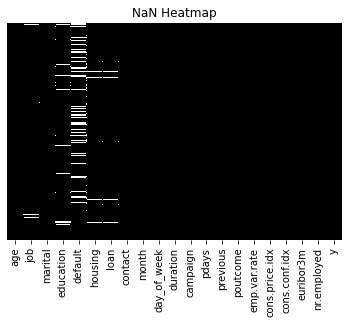

In [21]:
sns.heatmap(bank_db.isnull(),yticklabels=False,cbar=False,cmap='cubehelix')
plt.title('NaN Heatmap')

Remove "default" due to the high proportion of NaNs:

In [22]:
bank_db.drop(['default'], axis=1, inplace=True)

Due to proportionally small NaN values in job and marital, we can simply replace them with the mode.
This will aid in future modeling, whilst avoiding the removal of incidents:

In [23]:
job_mode = bank_db['job'].mode()
marital_mode = bank_db['marital'].mode()
print(job_mode)
print(marital_mode)

0    admin.
dtype: object
0    married
dtype: object


In [24]:
bank_db['job'] = bank_db['job'].fillna('admin.')
bank_db['marital'] = bank_db['marital'].fillna('married')
bank_db.isnull().sum()

age                  0
job                  0
marital              0
education         1731
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Check whether the NaNs incidents of housing and loan data is occuring in the same rows:

In [25]:
bank_db.iloc[bank_db[(bank_db.isnull().sum(axis=1) >=2)].index]

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,admin.,married,university.degree,NaN,NaN,telephone,may,mon,362,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,NaN,NaN,telephone,may,mon,212,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,NaN,NaN,telephone,may,mon,119,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,NaN,NaN,telephone,may,tue,437,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,NaN,NaN,telephone,may,tue,152,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,NaN,NaN,cellular,oct,tue,192,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,NaN,NaN,cellular,oct,thu,212,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,NaN,NaN,cellular,oct,thu,256,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,NaN,NaN,cellular,oct,mon,83,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


Text(0.5, 1.0, 'NaN Heatmap (Housing and Loan Only)')

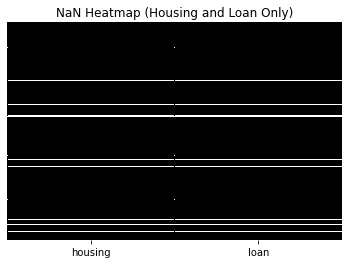

In [26]:
sns.heatmap(bank_db[['housing','loan']].isnull(),yticklabels=False,cbar=False,cmap='cubehelix')
plt.title('NaN Heatmap (Housing and Loan Only)')

Visually, the nans occur in the same incidents for loan and housing. Drop rows from dataframe

In [27]:
bank_db = bank_db.dropna(how='any', subset=['housing', 'loan'])

In [28]:
bank_db.isnull().sum()

age                  0
job                  0
marital              0
education         1691
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Success! Now to handle education. Will check mode and potentially replace:

In [29]:
education_mode = bank_db['education'].mode()
education_mode

0    university.degree
dtype: object

In [30]:
bank_db['education'] = bank_db['education'].fillna('university')

In [31]:
bank_db.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Text(0.5, 1.0, 'NaN Heatmap')

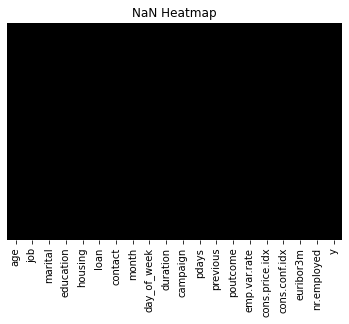

In [32]:
sns.heatmap(bank_db.isnull(),yticklabels=False,cbar=False,cmap='cubehelix')
plt.title('NaN Heatmap')

- all nulls have been dealt with

Rename response column, change to a boolean:

In [33]:
bank_db.rename(index=str, columns={'y': 'response'}, inplace = True)
bank_db['response'].replace({'yes': 1, 'no': 0}, inplace=True)

### Variables of Interest

##### Nominal: Quantitative data visualisation and exploration

Univariate analysis of the target variable, client response

In [34]:
bank_db['response'].value_counts()

0    35665
1     4533
Name: response, dtype: int64

In [35]:
bank_db['response'].value_counts(normalize=True)

0    0.887233
1    0.112767
Name: response, dtype: float64

Text(0.5, 6.79999999999999, 'Count')

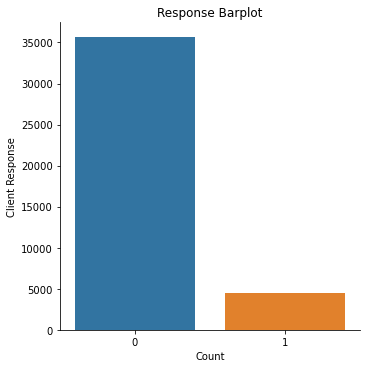

In [36]:
sns.catplot(x='response', data=bank_db , kind='count' )
plt.title('Response Barplot')
plt.ylabel('Client Response')
plt.xlabel('Count')

- the above blot visually reiterates that 36548 (88.7%) clients negatively responded to the telemarketing campaign, and only 4640 (11.3%) responded positively and subscribed to a long-term deposit.

Text(0.5, 1.0, 'Telemarketing Response')

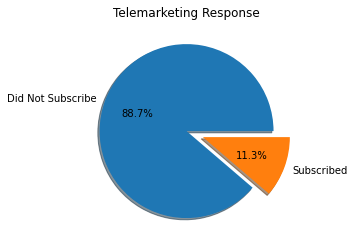

In [37]:
plt.pie(bank_db['response'].value_counts(), explode=(0,0.2), labels=["Did Not Subscribe","Subscribed"], autopct='%1.1f%%', shadow=True)
plt.title("Telemarketing Response")

Results of the previous campaign:

Text(0.5, 6.79999999999999, 'Count')

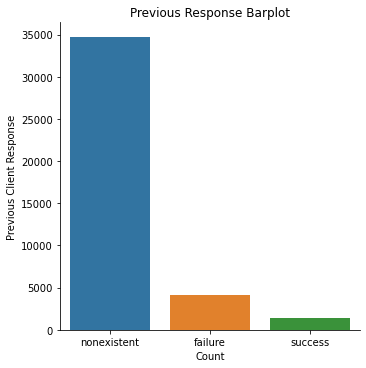

In [38]:
sns.catplot(x='poutcome', data=bank_db , kind='count' )
plt.title('Previous Response Barplot')
plt.ylabel('Previous Client Response')
plt.xlabel('Count')

Returning clients that positively responded to the most recent long-term deposit campaign:

In [39]:
returning = len(bank_db[(bank_db['poutcome']=='success') & (bank_db['response']==1)])/len(bank_db[bank_db['poutcome']=='success'])
print('Returning clients that responded positively to the new campaign: {}%'.format(round(returning*100)))

Returning clients that responded positively to the new campaign: 65%


Age:

Text(0, 0.5, 'Frequency')

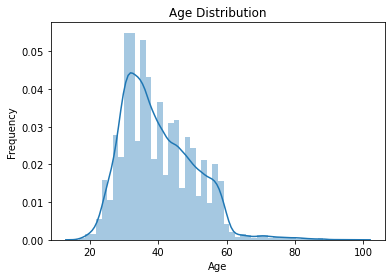

In [40]:
sns.distplot(bank_db['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

- mildly right (positively) skewed, as most of the data is positioned to the left of the plot

Grouping Age into appropiate bins:

In [41]:
age_groups = pd.cut(bank_db['age'], bins=[0,30,40,50,60,70,85], labels = ['20s','30s','40s','50s','60s','70+'])
# Add age bins to the dataframe, after 'age'
bank_db.insert(1,'age_group',age_groups)

Text(-9.075000000000003, 0.5, 'Count')

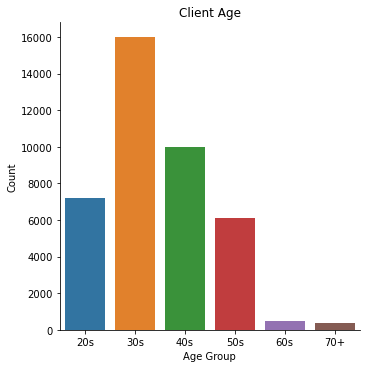

In [42]:
sns.catplot(x='age_group', data=bank_db , kind='count', order=['20s','30s','40s','50s','60s','70+'] )
plt.title('Client Age')
plt.xlabel("Age Group")
plt.ylabel("Count")

Text(0.5, 6.79999999999999, 'Response')

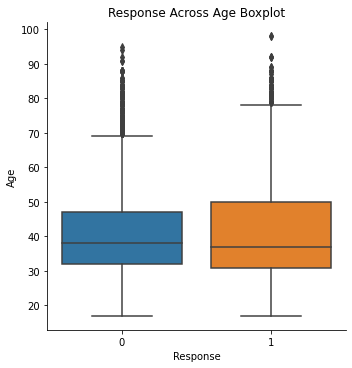

In [43]:
sns.catplot(x='response', y='age', data=bank_db , kind='box')
plt.title('Response Across Age Boxplot')
plt.ylabel('Age')
plt.xlabel('Response')

Text(0.5, 6.79999999999999, 'Age')

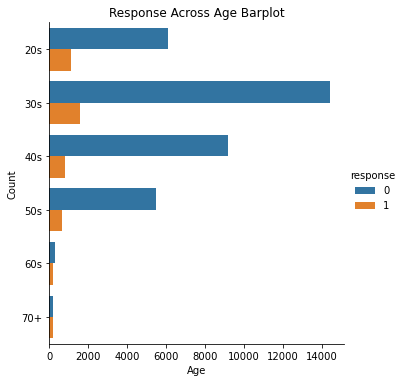

In [44]:
sns.catplot(y='age_group', hue='response', data=bank_db , kind='count')
plt.title('Response Across Age Barplot')
plt.ylabel('Count')
plt.xlabel('Age')

- due to imbalanced data, turn this into a percentage for clarity!

Re-applicable bar chart function:

In [45]:
def bar_chart(train, feature):
    subscribed = train[train['response']==1][feature].value_counts(normalize=True)*100
    didnt_subscribe = train[train['response']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([subscribed,didnt_subscribe])
    df.index = ['Subscribed','Did Not Subscribe']
    df.plot(kind='bar',stacked=False, figsize=(10,5))

Text(0, 0.5, 'Percentage')

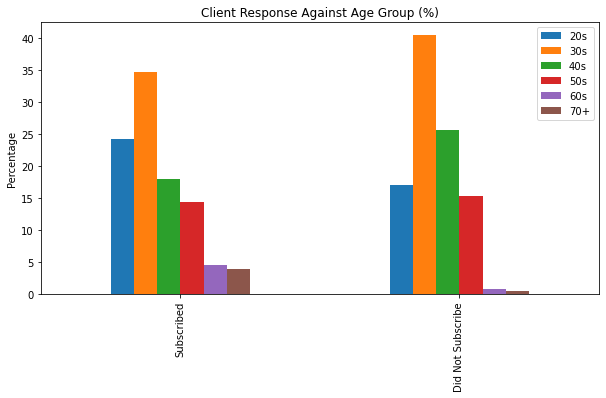

In [46]:
bar_chart(bank_db, 'age_group')
plt.title('Client Response Against Age Group (%)')
plt.ylabel('Percentage')

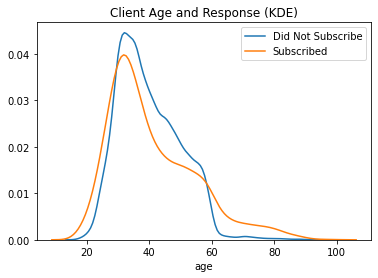

In [47]:
sns.distplot(bank_db[bank_db.response==0]['age'], hist=False,kde=True,label='Did Not Subscribe')
sns.distplot(bank_db[bank_db.response==1]['age'], hist=False,kde=True,label='Subscribed')
plt.legend(loc='best')
plt.title('Client Age and Response (KDE)')
plt.show()

Call Duration:

Text(0, 0.5, 'Frequency')

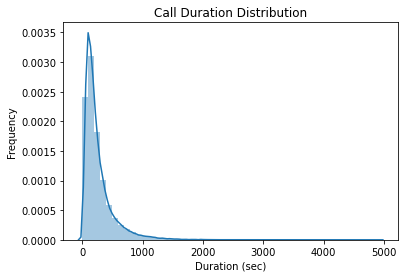

In [48]:
sns.distplot(bank_db['duration'])
plt.title('Call Duration Distribution')
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency')

Text(0.5, 20.80000000000002, 'Duration (sec)')

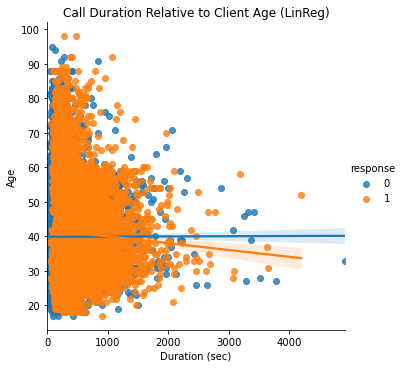

In [49]:
sns.lmplot(x='duration', y= 'age', hue='response', data=bank_db, fit_reg=True)
plt.title('Call Duration Relative to Client Age (LinReg)')
plt.ylabel('Age')
plt.xlabel('Duration (sec)')

- 30-50 yr olds tended to have longer calls on average

Text(0, 0.5, 'Duration (sec)')

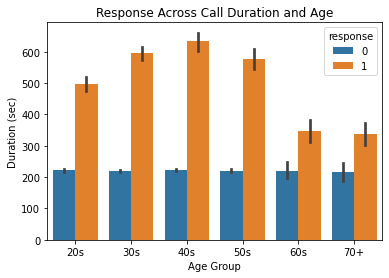

In [50]:
sns.barplot(x="age_group", y="duration", hue="response", data=bank_db)
plt.title('Response Across Call Duration and Age')
plt.xlabel('Age Group')
plt.ylabel('Duration (sec)')

- proportion is important! As can be seen in the normalized bar plot, the 20s age group were actually more likely to subscribe than not

- very close. 60+ age bracket had a higher distribution of those that subscribes/ responded positively

- the call duration across all ages with a negative response did not change??
- the longer the call, the more positive the response, particularily targeted at those 30-50 years old (middle aged)

Campaign:

Text(0, 0.5, 'Frequency')

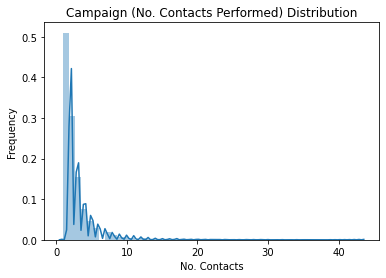

In [51]:
sns.distplot(bank_db['campaign'])
plt.title('Campaign (No. Contacts Performed) Distribution')
plt.xlabel('No. Contacts')
plt.ylabel('Frequency')

In [52]:
bank_db['campaign'].nunique

<bound method IndexOpsMixin.nunique of 0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    2
41186    1
41187    3
Name: campaign, Length: 40198, dtype: int64>

In [53]:
campaign_groups = pd.cut(bank_db['campaign'], bins=[0,1,2,3,4,5,6,7,8,9,10], labels = ['1','2','3','4','5','6','7','8','9','10+'])
# Add campaign bins to the dataframe, after 'campaign'
bank_db.insert(1,'campaign_groups',campaign_groups)

Text(-9.075000000000003, 0.5, 'Count')

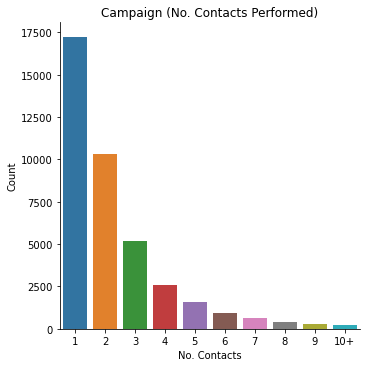

In [54]:
sns.catplot(x='campaign_groups', data=bank_db , kind='count')
plt.title('Campaign (No. Contacts Performed)')
plt.xlabel("No. Contacts")
plt.ylabel("Count")

Text(0.5, 21.70625000000002, 'No. Contacts')

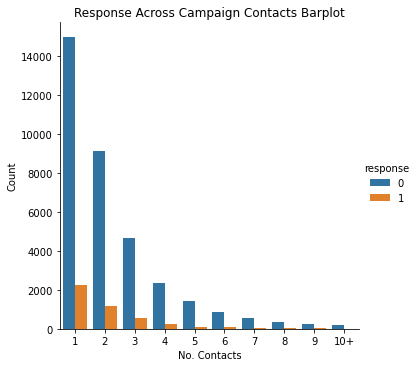

In [55]:
sns.catplot(x='campaign_groups', hue='response', data=bank_db , kind='count')
plt.title('Response Across Campaign Contacts Barplot')
plt.ylabel('Count')
plt.xlabel('No. Contacts')

Text(0.5, 6.79999999999999, 'No. Contacts')

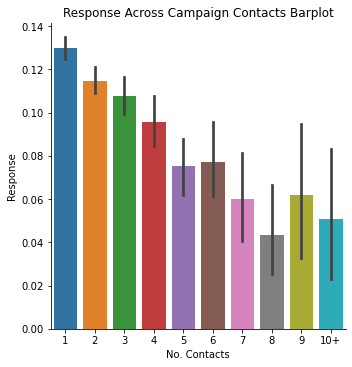

In [56]:
sns.catplot(x='campaign_groups', y='response', data=bank_db , kind='bar')
plt.title('Response Across Campaign Contacts Barplot')
plt.ylabel('Response')
plt.xlabel('No. Contacts')

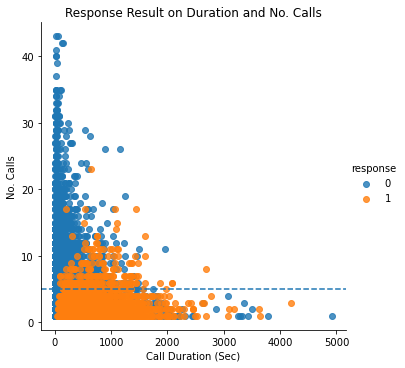

In [279]:
sns.lmplot(x='duration', y= 'campaign', data=bank_db, hue='response', fit_reg=False)
plt.title('Response Result on Duration and No. Calls')
plt.ylabel('No. Calls')
plt.xlabel('Call Duration (Sec)')
plt.axhline(y=5, linestyle='--')

- Higher subscription rate when the client received less than 5 telemarketing calls. In otherwords, client were most likely to reject the campaign if they received more than 5 calls.
- the plot significantly distinguishes the clients which subscribed to the long term deposit from the clients who did not. Clients who subscribed to the deposit where contacted fewer times and had longer call duration.

Pdays: (number days passed since last contact)

/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Frequency')

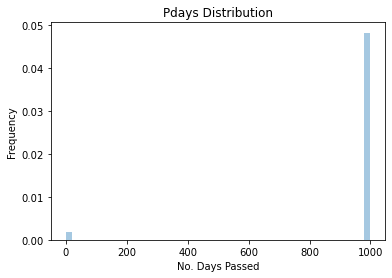

In [58]:
sns.distplot(bank_db['pdays'])
plt.title('Pdays Distribution')
plt.xlabel('No. Days Passed')
plt.ylabel('Frequency')

In [59]:
np.unique(bank_db['pdays'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  25,  26,  27,
       999])

In [60]:
bank_db['pdays'].value_counts()

999    38717
3        429
6        404
4        115
9         62
2         60
7         58
12        56
10        48
5         46
13        36
11        28
1         26
15        24
14        20
8         16
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

- will remove this heaviliy skewed data when feature engineering.
- pdays refers to the number of days that passed by after the client was last contacted from a previous campaign, where 999 means client was not previously contacted. In this case, such a large portion of clients were not contacted so this attribute seems to be null and void.

In [61]:
bank_db.drop(['pdays'], axis=1, inplace=True)

Previous (contacts prior to campaign):

/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Frequency')

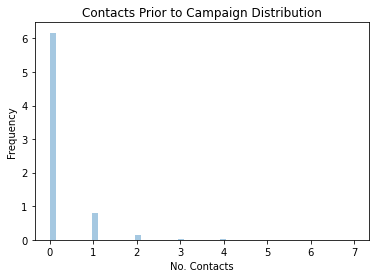

In [62]:
sns.distplot(bank_db['previous'])
plt.title('Contacts Prior to Campaign Distribution')
plt.xlabel('No. Contacts')
plt.ylabel('Frequency')

Numerical correlation:

In [63]:
corr_matrix = bank_db.corr()
corr_matrix

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
age,1.000000,-0.000134,0.004619,0.025081,-0.000962,0.000714,0.129586,0.010230,-0.018346,0.030319
duration,-0.000134,1.000000,-0.071448,0.019363,-0.026801,0.006366,-0.008635,-0.031273,-0.042943,0.405043
campaign,0.004619,-0.071448,1.000000,-0.079599,0.151611,0.128957,-0.014300,0.135940,0.144974,-0.065743
previous,0.025081,0.019363,-0.079599,1.000000,-0.420353,-0.204167,-0.050569,-0.453702,-0.499793,0.228633
emp.var.rate,-0.000962,-0.026801,0.151611,-0.420353,1.000000,0.775032,0.196934,0.972249,0.907141,-0.297407
cons.price.idx,0.000714,0.006366,0.128957,-0.204167,0.775032,1.000000,0.059504,0.687881,0.521676,-0.135705
cons.conf.idx,0.129586,-0.008635,-0.014300,-0.050569,0.196934,0.059504,1.000000,0.278466,0.101512,0.055327
euribor3m,0.010230,-0.031273,0.135940,-0.453702,0.972249,0.687881,0.278466,1.000000,0.945243,-0.306283
nr.employed,-0.018346,-0.042943,0.144974,-0.499793,0.907141,0.521676,0.101512,0.945243,1.000000,-0.352966
response,0.030319,0.405043,-0.065743,0.228633,-0.297407,-0.135705,0.055327,-0.306283,-0.352966,1.000000


Text(0.5, 1.0, 'Telemarketing Data Correlation Heat Map')

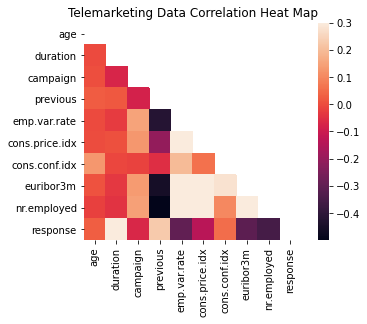

In [64]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True)
plt.title('Telemarketing Data Correlation Heat Map')

- duration has the greatest correlation with the targeted variable (client response to the campaign)

##### Categorical: Qualitative data visualisation and exploration

Client Occupation:

In [65]:
bank_db['job'].value_counts()

admin.           10520
blue-collar       9014
technician        6596
services          3868
management        2853
retired           1676
entrepreneur      1420
self-employed     1381
housemaid         1031
unemployed         987
student            852
Name: job, dtype: int64

Text(0.5, 0, 'Count')

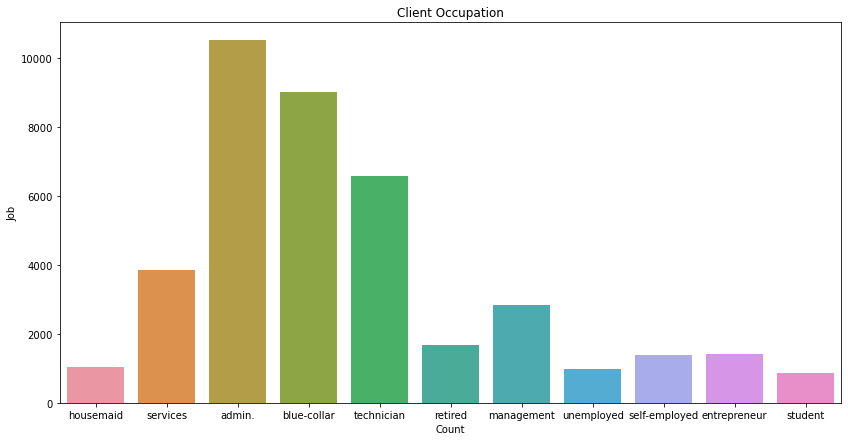

In [66]:
plt.figure(figsize=(14,7))
sns.countplot(bank_db['job'])
plt.title('Client Occupation')
plt.ylabel('Job')
plt.xlabel('Count')

Text(0.5, 6.79999999999999, 'Count')

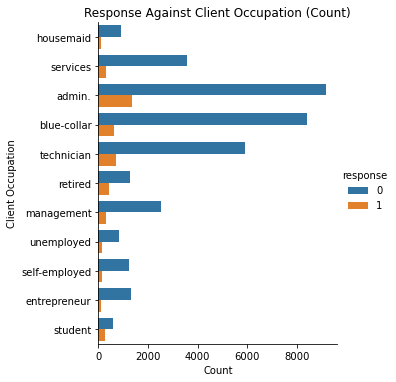

In [67]:
sns.catplot(y="job", hue="response", kind="count", data=bank_db)
plt.title('Response Against Client Occupation (Count)')
plt.ylabel('Client Occupation')
plt.xlabel('Count')

- Those that work in admin had the greatest proportion of those that subscribed to the long-term deposit

Text(0, 0.5, 'Percentage')

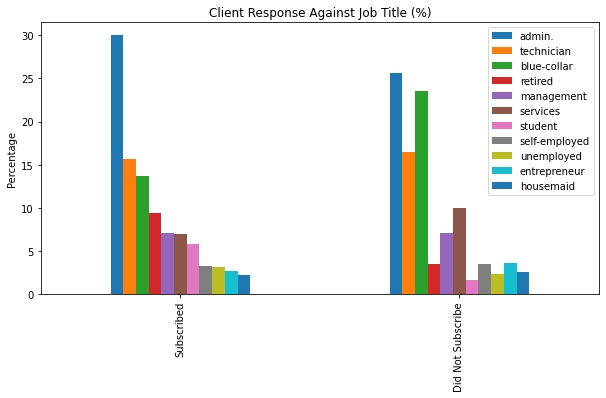

In [68]:
bar_chart(bank_db, 'job')
plt.title('Client Response Against Job Title (%)')
plt.ylabel('Percentage')

Marital Status:

Text(0.5, 0, 'Marital Status')

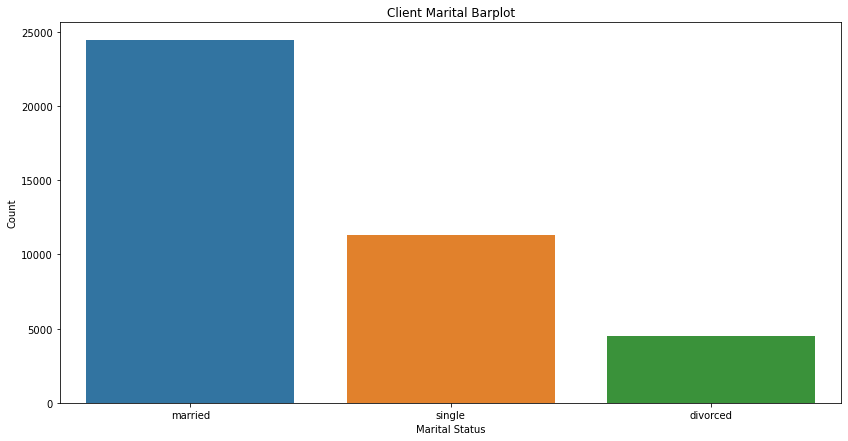

In [69]:
plt.figure(figsize=(14,7))
sns.countplot(bank_db['marital'])
plt.title('Client Marital Barplot')
plt.ylabel('Count')
plt.xlabel('Marital Status')

Text(0.5, 6.79999999999999, 'Marital Status')

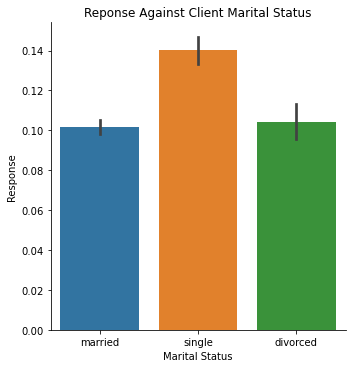

In [70]:
sns.catplot(x="marital", y="response", kind="bar", data=bank_db)
plt.title('Reponse Against Client Marital Status')
plt.ylabel('Response')
plt.xlabel('Marital Status')

Text(0, 0.5, 'Percentage')

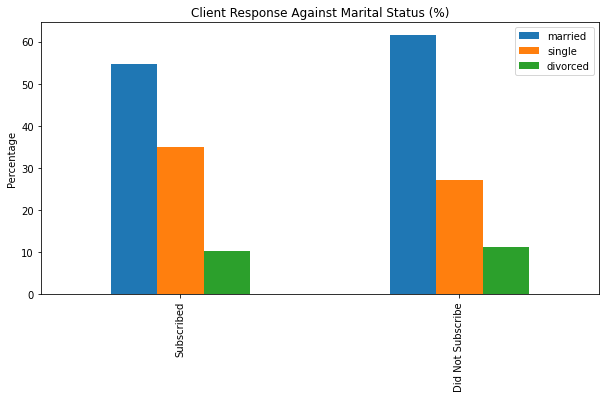

In [71]:
bar_chart(bank_db, 'marital')
plt.title('Client Response Against Marital Status (%)')
plt.ylabel('Percentage')

Client Education:

In [ ]:
sns.countplot(bank_db['education'])
plt.title('Client Education Barplot')
plt.ylabel('Count')
plt.xlabel('Client Education Level')

In [73]:
bank_db['education'].value_counts(normalize=True)

university.degree      0.295811
high.school            0.231230
basic.9y               0.146624
professional.course    0.127320
basic.4y               0.100975
basic.6y               0.055525
university             0.042067
illiterate             0.000448
Name: education, dtype: float64

- can assume that in the cleaning process that the sparse clients that may have been labelled as "illiterate" were in a potentially removed row due to multiple unknown variables

Mapping education categories into ammended groups to account for confusion between labels:

In [74]:
bank_db['education'] = bank_db['education'].map({'basic.4y': 'primary', 'basic.6y': 'primary', 'basic.9y': 'primary', 'high.school': 'secondary', 'university': 'tertiary', 'professional.course': 'tertiary', 'university.degree': 'tertiary'})

Text(0.5, 0, 'Client Education Level')

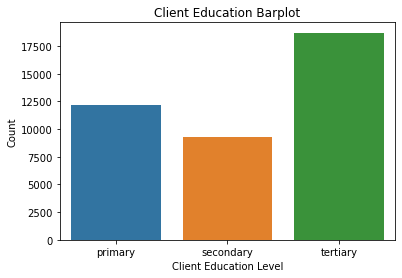

In [75]:
sns.countplot(bank_db['education'])
plt.title('Client Education Barplot')
plt.ylabel('Count')
plt.xlabel('Client Education Level')

Text(0.5, 6.79999999999999, 'Count')

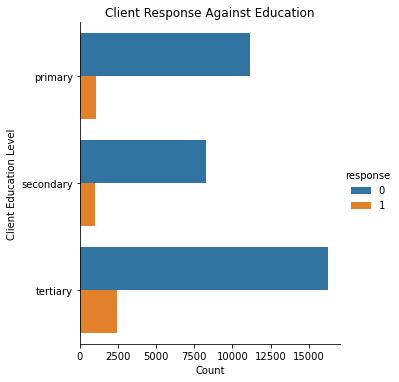

In [76]:
sns.catplot(y="education", hue="response", kind="count", data=bank_db)
plt.title('Client Response Against Education')
plt.ylabel('Client Education Level')
plt.xlabel('Count')

Text(0, 0.5, 'Percentage')

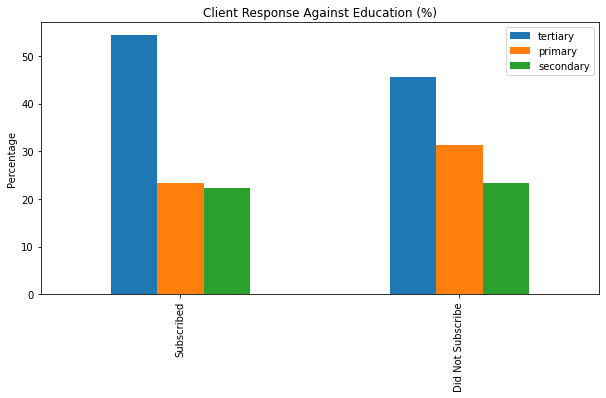

In [77]:
bar_chart(bank_db, 'education')
plt.title('Client Response Against Education (%)')
plt.ylabel('Percentage')

Clients with a Housing Loan:

Text(0.5, 0, 'Housing Loan')

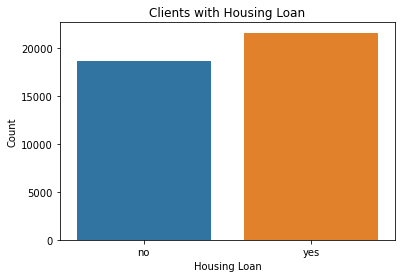

In [78]:
sns.countplot(bank_db['housing'])
plt.title('Clients with Housing Loan')
plt.ylabel('Count')
plt.xlabel('Housing Loan')

Text(0.5, 20.799999999999983, 'Housing Loan')

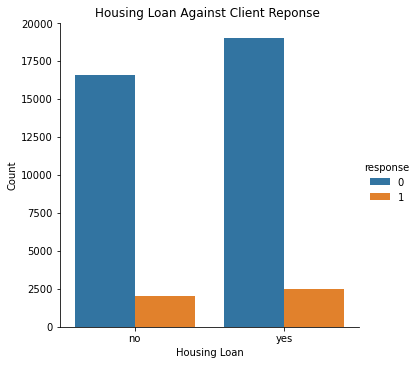

In [79]:
sns.catplot(x="housing", hue="response", kind="count", data=bank_db)
plt.title('Housing Loan Against Client Reponse ')
plt.ylabel('Count')
plt.xlabel('Housing Loan')

Clients with Personal Loans:

Text(0.5, 0, 'Personal Loan')

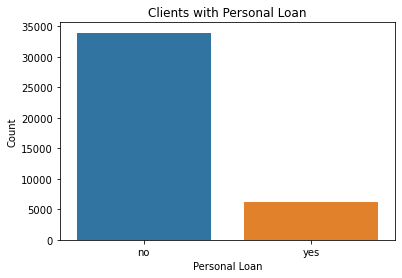

In [80]:
sns.countplot(bank_db['loan'])
plt.title('Clients with Personal Loan')
plt.ylabel('Count')
plt.xlabel('Personal Loan')

Text(0.5, 20.80000000000002, 'Personal Loan')

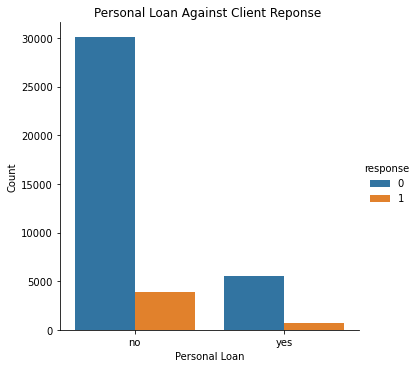

In [81]:
sns.catplot(x="loan", hue="response", kind="count", data=bank_db)
plt.title('Personal Loan Against Client Reponse ')
plt.ylabel('Count')
plt.xlabel('Personal Loan')

Day of Telemarketing Call:

Text(0.5, 0, 'Day of Week')

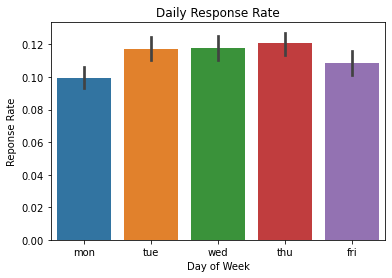

In [82]:
sns.barplot(x="day_of_week", y="response", data=bank_db)
plt.title('Daily Response Rate')
plt.ylabel('Reponse Rate')
plt.xlabel('Day of Week')

Month of Telemarketing Calls:

Text(0.5, 0, 'Month')

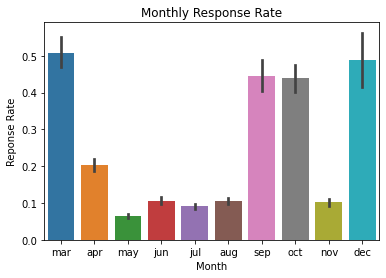

In [83]:
sns.barplot(x="month", y="response", data=bank_db, order=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Monthly Response Rate')
plt.ylabel('Reponse Rate')
plt.xlabel('Month')

## Feature Engineering

##### Preparing the catergorical variables for modelling:

In [84]:
# reminder of categorical variables:
bank_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              40198 non-null  int64   
 1   campaign_groups  39349 non-null  category
 2   age_group        40156 non-null  category
 3   job              40198 non-null  object  
 4   marital          40198 non-null  object  
 5   education        40180 non-null  object  
 6   housing          40198 non-null  object  
 7   loan             40198 non-null  object  
 8   contact          40198 non-null  object  
 9   month            40198 non-null  object  
 10  day_of_week      40198 non-null  object  
 11  duration         40198 non-null  int64   
 12  campaign         40198 non-null  int64   
 13  previous         40198 non-null  int64   
 14  poutcome         40198 non-null  object  
 15  emp.var.rate     40198 non-null  float64 
 16  cons.price.idx   40198 non-null  float64 
 17

In [85]:
bank_db.head()

,age,campaign_groups,age_group,job,marital,education,housing,loan,contact,month,...,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,1,50s,housemaid,married,primary,no,no,telephone,may,...,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,50s,services,married,secondary,no,no,telephone,may,...,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,30s,services,married,secondary,yes,no,telephone,may,...,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,30s,admin.,married,primary,no,no,telephone,may,...,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,50s,services,married,secondary,no,yes,telephone,may,...,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [86]:
# Binary objects to numerical
bank_db['housing'] = bank_db['housing'].map({'yes': 1, 'no': 0})
bank_db['loan'] = bank_db['loan'].map({'yes': 1, 'no': 0})

In [87]:
bank_num = pd.get_dummies(data = bank_db, columns = ['campaign_groups','age_group','job', 'marital','education','contact','month','day_of_week','poutcome'])

In [88]:
bank_num.head()

,age,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,261,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
1,57,0,0,149,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,226,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
3,40,0,0,151,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
4,56,0,1,307,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0


Drop duplicate "age" and "campaign" columns as they have a grouped equivalent:

In [89]:
bank_num.drop(['age','campaign'], axis=1, inplace=True)
bank_num.head()

,housing,loan,duration,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,261,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,149,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,226,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,151,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,307,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


##### Target variable

In [90]:
y = bank_num['response']

##### Predictor Variables

In [91]:
X = bank_num.drop(['response'], axis=1)

In [92]:
bank_num.corr()['response'].sort_values(ascending=False)

response                1.000000
duration                0.405043
poutcome_success        0.315464
previous                0.228633
month_mar               0.144796
                          ...   
contact_telephone      -0.143239
poutcome_nonexistent   -0.191609
emp.var.rate           -0.297407
euribor3m              -0.306283
nr.employed            -0.352966
Name: response, Length: 63, dtype: float64

- duration has the strongest correlation

##### Data Scaler

In [93]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

##### Split into train and test

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=42)

In [95]:
# 30% of the data will be used for testing
print("Total dataset: {}".format(bank_num.shape))
print("Training set (70%): {}".format(X_train.shape))
print("Test set (30%): {}".format(X_test.shape))

Total dataset: (40198, 63)
Training set (70%): (28138, 62)
Test set (30%): (12060, 62)


## Apply Machine Learning: Supervised

##### Logistic regression (Baseline)

Create Model:

In [96]:
logreg = LogisticRegression()

Fit model (train on the training data set)

In [97]:
logreg.fit(X_train, y_train)

/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy Score:

In [98]:
print('Training Data Accuracy = {:7.4f}'.format(logreg.score(X_train, y_train)))
print('Test Data Accuracy = {:7.4f}'.format(logreg.score(X_test, y_test)))

Training Data Accuracy =  0.9119
Test Data Accuracy =  0.9086


As an evaluatory metric for classification models, the accuracy score denotes the percentage of correct predictions made by the model. The logistic regression algorithm resulted in a score of 90.87%. This suggests a  significantly high level of model strength to succesfully classify the customer response in whether they will subscribe to a long-term deposit.
- test set and train set both predicted almost as well as eachother
- overfitting seems to be a low possibility


Plotting ROC Curves:

In [99]:
def plot_roc_curve(X_test, y_test):
    # Prediction values for observations (test)
    preds = logreg.predict_proba(X_test)[:,1]

    # Store fpr and tpr 
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store AUC for annotation
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='red', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'blue', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Telemarketing Response (LogReg)')
    plt.legend(loc = "lower right")
    plt.show()

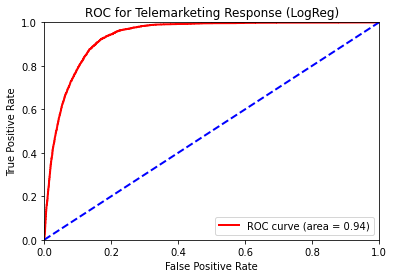

In [100]:
# Train set
plot_roc_curve(X_train, y_train)

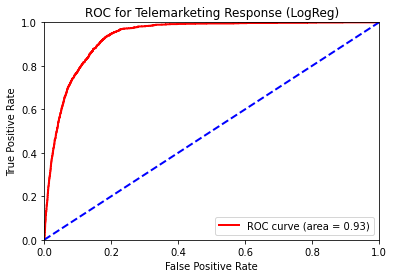

In [101]:
# Test set
plot_roc_curve(X_test, y_test)

##### Looking into the FPR and TPR vectors for the best model

In [102]:
y_pred = logreg.predict(X_test)

con_matrix = metrics.confusion_matrix(y_test, y_pred)
print(con_matrix)

#[row, column]
TP = con_matrix[1, 1]
TN = con_matrix[0, 0]
FP = con_matrix[0, 1]
FN = con_matrix[1, 0]

[[10394   285]
 [  817   564]]


As a readable dataframe:

In [103]:
pd.DataFrame(con_matrix, index=['Client Subscribed', 'Client Did Not Subscribe'], columns=['Predicted Subscribtion','Predicted Wouldnt Subscribe'])

,Predicted Subscribtion,Predicted Wouldnt Subscribe
Client Subscribed,10394,285
Client Did Not Subscribe,817,564


As a heatmap:

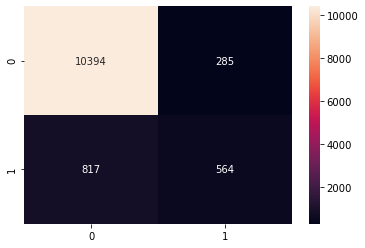

In [104]:
sns.heatmap(con_matrix, annot=True,fmt="d")

Original notes for the initial matix before SMOTE:
-  the confusion matrix in this scenario breaks down the forms of error for each actual and predicted response. With regards to the test set, the model deemed rather succesful as most of the results were True Postive predictions (10,394) - in comparison to only 816 False Negative predictions (where it was predicted that they would subscribe when in actuality they didn't). 

NOTE: the result of the accuracy score can be potentially misleading due to an unbalanced data set (i.e. the number of incidents in the two reponse classes are severely skewed toward clients that did not subscribe). It is important to point out this bias as seen in the confusion matrix. The dataset is highly unbalanced with almost all clients responding negatively to the telemarketing campaign (not subscribing to the long-term deposit). This taints the accuracy of the logistic regression model. 
A resampling method to balance the classes may be highly valuable in this case.

Classification Report

In [105]:
logreg_clas = metrics.classification_report(y_test, y_pred)
print(logreg_clas)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10679
           1       0.66      0.41      0.51      1381

    accuracy                           0.91     12060
   macro avg       0.80      0.69      0.73     12060
weighted avg       0.90      0.91      0.90     12060



- With regards to the classifcation report, the precision of predicting instances where the client did not subscribe (0) accurately was 93%.  Note that the precision of prediciting instances where the client did subscribe (1) was only 66%.
- the recall (also known as the sensitivity) denotes that when the true value is positive (client did subscribe), the prediction is correct only 41% before implementing SMOTE. Check this value after resampling.

##### SMOTE for Imbalanced Classification

It is apparent that the data is extremely biased with regards to the resultant client subscribers (target variable) - only 11.3% of clients subscribed to the long term deposit. To account for the class imbalance, we need to implement a resampling technique on the training dataset. 
When considering imbalanced classification data, most ML models will ignore/ behave poorly on the minoroty class. This is a critical point as in this case, the minority class (client subscription) is the most desired outcome.
SMOTE (Synthetic Minority Oversampling Technique) technique is a form of data augmentation that addresses this issue by oversampling the minority class.

In [106]:
! pip install imblearn

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [109]:
# Resampled values:
print("Before resample, counts of class '1': {}".format(sum(y_train==1)))
print("Before resample, counts of class '0': {} \n".format(sum(y_train==0)))
print("Training shape X: {}".format(X_train_res.shape))
print("Training shape y: {}".format(y_train_res.shape))
print("After resample, counts of class '1': {}".format(sum(y_train_res==1)))
print("After resample, counts of class '0': {} \n".format(sum(y_train_res==0)))

Before resample, counts of class '1': 3152
Before resample, counts of class '0': 24986 

Training shape X: (49972, 62)
Training shape y: (49972,)
After resample, counts of class '1': 24986
After resample, counts of class '0': 24986 



##### Logistic regression (Baseline) - After SMOTE

Create Model:

In [110]:
logreg = LogisticRegression()

Fit model (train on the training data set)

In [111]:
logreg.fit(X_train_res, y_train_res)

/Users/annaschreiner/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy Score:

In [112]:
print('Training Data Accuracy = {:7.4f}'.format(logreg.score(X_train_res, y_train_res)))
print('Test Data Accuracy = {:7.4f}'.format(logreg.score(X_test, y_test)))

Training Data Accuracy =  0.8876
Test Data Accuracy =  0.8675


The accuracy score after resampling for the logistic regression algorithm resulted in a score of 86.79% (percentage of correct predictions made by the model). This is slightly lower than the original trail before SMOTE. This is still a  significantly high level of model strength to succesfully classify the customer response in whether they will subscribe to a long-term deposit - however, will have to look into other evaluation metrics to support the resmapling method.
- test set and train set both predicted almost as well as eachother
- overfitting seems to be a low possibility


Plotting ROC Curves:

In [113]:
def plot_roc_curve(X_test, y_test):
    # Prediction values for observations (test)
    preds = logreg.predict_proba(X_test)[:,1]

    # Store fpr and tpr 
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store AUC for annotation
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='red', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'blue', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Telemarketing Response (LogReg)')
    plt.legend(loc = "lower right")
    plt.show()

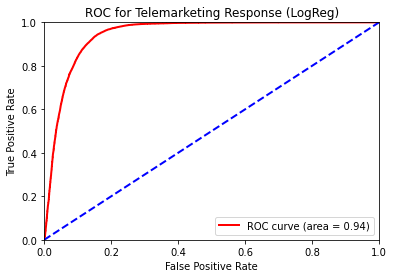

In [114]:
# Train set
plot_roc_curve(X_train_res, y_train_res)

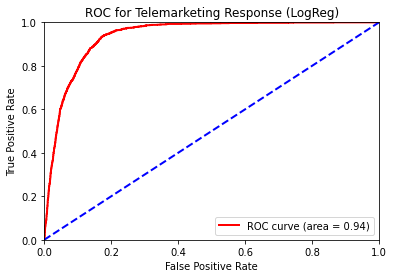

In [115]:
# Test set
plot_roc_curve(X_test, y_test)

##### Looking into the FPR and TPR vectors for the best model

In [116]:
y_pred = logreg.predict(X_test)

con_matrix = metrics.confusion_matrix(y_test, y_pred)
print(con_matrix)

#[row, column]
TP = con_matrix[1, 1]
TN = con_matrix[0, 0]
FP = con_matrix[0, 1]
FN = con_matrix[1, 0]

[[9266 1413]
 [ 185 1196]]


As a readable dataframe:

In [117]:
pd.DataFrame(con_matrix, index=['Client Subscribed', 'Client Did Not Subscribe'], columns=['Predicted Subscribtion','Predicted Wouldnt Subscribe'])

,Predicted Subscribtion,Predicted Wouldnt Subscribe
Client Subscribed,9266,1413
Client Did Not Subscribe,185,1196


As a heatmap:

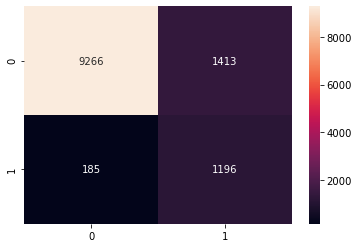

In [118]:
sns.heatmap(con_matrix, annot=True,fmt="d")

NOTE: The implementation of the SMOTE resampling method was highly valuable in this case - the number of incidents in the two reponse classes are no longer highly skewed toward clients that did not subscribe). 
Original notes for the initial matix before SMOTE:
-  the confusion matrix in this scenario breaks down the forms of error for each actual and predicted response. With regards to the test set, the model deemed rather succesful as most of the results were True Postive predictions (9271) - in comparison to only 185 False Negative predictions (where it was predicted that they would subscribe when in actuality they didn't). 
- however, the model was relatively poor at predicting when a client would not subscribe.

Classification Report

In [119]:
logreg_clas_res = metrics.classification_report(y_test, y_pred)
print(logreg_clas_res)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10679
           1       0.46      0.87      0.60      1381

    accuracy                           0.87     12060
   macro avg       0.72      0.87      0.76     12060
weighted avg       0.92      0.87      0.88     12060



- With regards to the classifcation report, the precision of predicting instances where the client did not subscribe (0) accurately was 98%.  Note that the precision of prediciting instances where the client did subscribe (1) was only 46%.
- the recall (also known as the sensitivity) denotes that when the true value is positive (client did subscribe), the prediction is correct 87% of the time - this was originally only 41% before implementing SMOTE.

LOGISTC REGRESSION EVALUATION:
- far more precise in predicting instance when client are unlikely to subscribe (98 vs 46%). The precision decreased after SMOTE.
- Recall improved signifcantly after SMOTE implementation, particularily in regards to the sensitivity of predicting instances where the client did subscribe.

##### Support Vector Machine (Complex)
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
- see link for pros/cons and hyperparameters

Create classifier: Will be expecting the decision boundary to be linear

In [120]:
clf = svm.SVC(kernel='linear')

Train the model (on the resampled training dataset):

In [121]:
# print each head, check for merging? - error np.array?
clf.fit(X_train, y_train)

SVC(kernel='linear')

Predicting test set response

In [122]:
y_pred = clf.predict(X_test)

Accuracy Score:

In [123]:
print('Training Data Accuracy = {:7.4f}'.format(clf.score(X_train, y_train)))
print('Test Data Accuracy = {:7.4f}'.format(clf.score(X_test, y_test)))

Training Data Accuracy =  0.9051
Test Data Accuracy =  0.9047


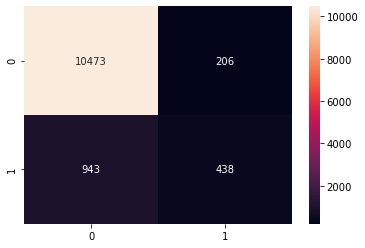

In [124]:
con_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True,fmt="d")

In [125]:
pd.DataFrame(con_matrix, index=['Client Subscribed', 'Client Did Not Subscribe'], columns=['Predicted Subscribtion','Predicted Wouldnt Subscribe'])

,Predicted Subscribtion,Predicted Wouldnt Subscribe
Client Subscribed,10473,206
Client Did Not Subscribe,943,438


Finding the support vectors of the trained SVM:

In [126]:
support_vectors = clf.support_vectors_
support_vectors

array([[-1.07639657, -0.42899341,  0.82316506, ...,  2.95081634,
        -2.51542815, -0.18605822],
       [-1.07639657, -0.42899341,  1.24724693, ..., -0.33888927,
         0.39754664, -0.18605822],
       [-1.07639657, -0.42899341, -0.33342185, ..., -0.33888927,
         0.39754664, -0.18605822],
       ...,
       [-1.07639657, -0.42899341,  1.5595254 , ..., -0.33888927,
         0.39754664, -0.18605822],
       [-1.07639657, -0.42899341, -0.11367034, ..., -0.33888927,
        -2.51542815,  5.37466174],
       [-1.07639657, -0.42899341,  0.03283067, ...,  2.95081634,
        -2.51542815, -0.18605822]])

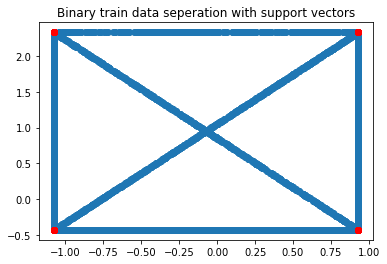

In [127]:
# https://www.machinecurve.com/index.php/2020/05/03/creating-a-simple-binary-svm-classifier-with-python-and-scikit-learn/
plt.scatter(X_train_res[:,0], X_train_res[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Binary train data seperation with support vectors')
plt.show()

In [128]:
# get indices of support vectors
support_indices = clf.support_
support_indices

array([    5,    37,    40, ..., 28121, 28124, 28131], dtype=int32)

In [129]:
# get number of support vectors for each class
n_support = clf.n_support_
n_support

array([2828, 2805], dtype=int32)

In [130]:
# Houston we have a problem!! "too many indices"
# we need the linear division! line!! Dummy variables are stumping my ability to model/ compare to orignal sample

Visualizing the decision boundary:

In [131]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

In [ ]:
#error
#plot_decision_regions(X_test, y_test, clf=clf, legend=2)
#plt.show()

Classification Report:

In [133]:
svm_clas = metrics.classification_report(y_test, y_pred)
print(svm_clas)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10679
           1       0.68      0.32      0.43      1381

    accuracy                           0.90     12060
   macro avg       0.80      0.65      0.69     12060
weighted avg       0.89      0.90      0.89     12060



In [158]:
##### Comparing the supervised ML model evaluation metrics:

In [163]:
print("Logistic Regression:")
print(logreg_clas)

print("Logistic Regression with SMOTE:")
print(logreg_clas_res)

print("Support Vector Machine:")
print(svm_clas)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10679
           1       0.66      0.41      0.51      1381

    accuracy                           0.91     12060
   macro avg       0.80      0.69      0.73     12060
weighted avg       0.90      0.91      0.90     12060

Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10679
           1       0.46      0.87      0.60      1381

    accuracy                           0.87     12060
   macro avg       0.72      0.87      0.76     12060
weighted avg       0.92      0.87      0.88     12060

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10679
           1       0.68      0.32      0.43      1381

    accuracy                           0.90     12060
   macro avg       0.80      0.65      0.69     120

Visualisation (bar):

In [264]:
# initialize list of lists 
data0 = [['Logreg', 0.91, 0.93, 0.97], ['Logreg SMOTE', 0.87, 0.98, 0.87], ['SVM', 0.90, 0.92, 0.98]] 
data1 = [['Logreg', 0.91, 0.66, 0.41], ['Logreg SMOTE', 0.87, 0.46, 0.87], ['SVM', 0.90, 0.68, 0.32]]

# Create the pandas DataFrame 
response_0 = pd.DataFrame(data0, columns = ['model', 'accuracy', 'precision', 'recall']) 
response_1 = pd.DataFrame(data1, columns = ['model', 'accuracy', 'precision', 'recall'])

Model evaluation when clients not subscribe (response = 0):

In [265]:
response_0

,model,accuracy,precision,recall
0,Logreg,0.91,0.93,0.97
1,Logreg SMOTE,0.87,0.98,0.87
2,SVM,0.90,0.92,0.98


In [266]:
response_0.set_index('model',inplace=True)

In [267]:
response_0.head()

,accuracy,precision,recall
model,,,
Logreg,0.91,0.93,0.97
Logreg SMOTE,0.87,0.98,0.87
SVM,0.90,0.92,0.98


In [268]:
response_0.index.name = None

In [269]:
response_0.head()

,accuracy,precision,recall
Logreg,0.91,0.93,0.97
Logreg SMOTE,0.87,0.98,0.87
SVM,0.90,0.92,0.98


Text(0, 0.5, 'Percentage')

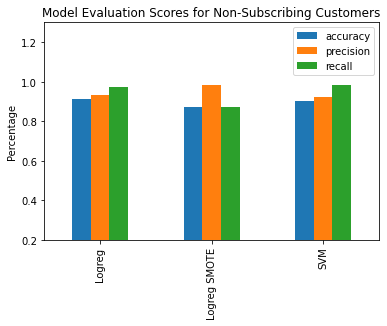

In [284]:
response_0.plot.bar()
plt.ylim(0.2,1.3)
plt.title('Model Evaluation Scores for Non-Subscribing Customers')
plt.ylabel('Percentage')

Model evaluation when clients subscribed (response = 1):

In [271]:
response_1

,model,accuracy,precision,recall
0,Logreg,0.91,0.66,0.41
1,Logreg SMOTE,0.87,0.46,0.87
2,SVM,0.90,0.68,0.32


In [272]:
response_1.set_index('model',inplace=True)

In [273]:
response_1.head()

,accuracy,precision,recall
model,,,
Logreg,0.91,0.66,0.41
Logreg SMOTE,0.87,0.46,0.87
SVM,0.90,0.68,0.32


In [274]:
response_1.index.name = None

In [275]:
response_1.head()

,accuracy,precision,recall
Logreg,0.91,0.66,0.41
Logreg SMOTE,0.87,0.46,0.87
SVM,0.90,0.68,0.32


Text(0, 0.5, 'Percentage')

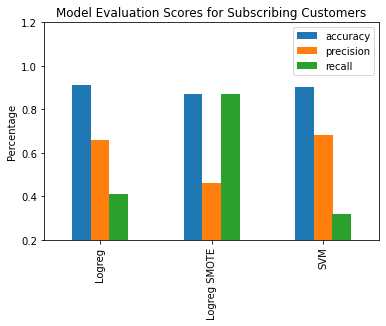

In [285]:
response_1.plot.bar()
plt.ylim(0.2,1.2)
plt.title('Model Evaluation Scores for Subscribing Customers')
plt.ylabel('Percentage')

## Apply Machine Learning: Unsupervised

##### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

##### Predictor Variables/ new feature vector for unsupervised learning:

In [277]:
client_attributes = ['age', 'job', 'marital', 'education', 'housing', 'loan','response']
client = bank_db[client_attributes]
client.head()

,age,job,marital,education,housing,loan,response
0,56,housemaid,married,primary,0,0,0
1,57,services,married,secondary,0,0,0
2,37,services,married,secondary,1,0,0
3,40,admin.,married,primary,0,0,0
4,56,services,married,secondary,0,1,0


- will retrieve new dummy variables for job, marital and education 

In [135]:
client_num = pd.get_dummies(data = client, columns = ['job', 'marital', 'education'])

In [136]:
client_num.head()

,age,housing,loan,response,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,56,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,57,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,37,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,40,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,56,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [137]:
X = client_num.drop(['response'], axis=1)
X.head()

,age,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,56,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,57,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,37,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,56,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [138]:
X.columns

Index(['age', 'housing', 'loan', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary'],
      dtype='object')

##### Target variable

In [139]:
y = client_num['response']

##### Data Scaler

In [140]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

##### Clustering with K Means
(see lab 6.1.1 and 6.1, wk 7 for help)
https://www.mygreatlearning.com/blog/learning-data-science-with-k-means-clustering/

Aim is to cluster the data to determine whether a cluster is more likely to respond to the telemarketing calls in a certain way. As the target is binary (two classes) we will start with k=2 and increase from there to draw any potentially meaningful insights.

for k = 2,
Create k means cluster, then fit on scaled df:

In [141]:
kmean_2 = KMeans(n_clusters=2)
kmean_2.fit(X_scale)

KMeans(n_clusters=2)

Retrieve model labels:

In [142]:
labels_2cluster = kmean_2.labels_
print(labels_2cluster)

[0 1 1 ... 1 1 1]


Check the Sum of Squares (WSS)

In [143]:
kmean_2.inertia_

719718.096777195

Inertia_ function calculates the Sum of Squares (WSS)  distance for all observations in the dataset (when k=2). Observe varying WSS according to different k values to find optimal level.

k = 3:

In [144]:
kmean_3 = KMeans(n_clusters=3)
kmean_3.fit(X_scale)
labels_3cluster = kmean_3.labels_
kmean_3.inertia_

652563.8339481703

k = 4:

In [145]:
kmean_4 = KMeans(n_clusters=4)
kmean_4.fit(X_scale)
labels_4cluster = kmean_4.labels_
kmean_4.inertia_

614752.1129396557

k = 5:

In [146]:
kmean_5 = KMeans(n_clusters=5)
kmean_5.fit(X_scale)
labels_5cluster = kmean_5.labels_
kmean_5.inertia_

566373.0360139691

k = 6:

In [147]:
kmean_6 = KMeans(n_clusters=6)
kmean_6.fit(X_scale)
labels_6cluster = kmean_6.labels_
kmean_6.inertia_

528891.7168530736

- quick observation: as k increases, the Sum of Squares (WSS) decreases

Determining optimal k using the elbow method:
Note: 
- As k increase the sum of square distance goes towards zero. 
- In plot form, the "elbow" signifies the optimal value of k

In [148]:
sum_sq_dist = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scale)
    sum_sq_dist.append(km.inertia_)

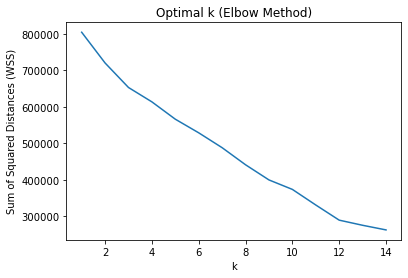

In [149]:
plt.plot(K, sum_sq_dist)
plt.title('Optimal k (Elbow Method)')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances (WSS)')
plt.show()

- not much of a bend to signify optimal k. Visualize/profile clusters.

In [150]:
# attempt plot - should I've using x_scale? Becuase it doesnt work!
# should the matrix include response?
# how do Iplot the split dummy variables?! e.g "job" without it being individual?
X['labels_2'] = labels_2cluster

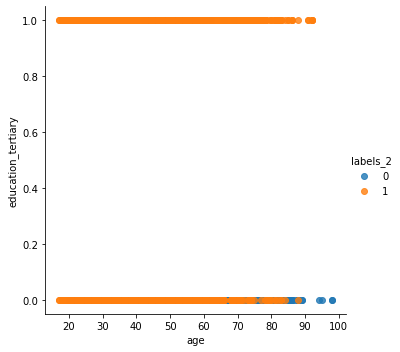

In [151]:
sns.lmplot(x='age', y='education_tertiary', data=X, hue='labels_2', fit_reg=False)

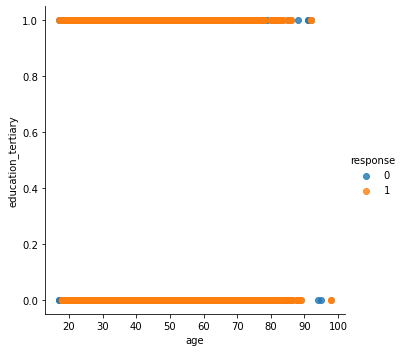

In [152]:
sns.lmplot(x='age', y='education_tertiary', data=client_num, hue='response', fit_reg=False)

Append the cluster classification to the client (numerical) data

In [153]:
client_num['labels_2'] = labels_2cluster
client_num['labels_3'] = labels_3cluster
client_num['labels_4'] = labels_4cluster
client_num.head()

,age,housing,loan,response,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,labels_2,labels_3,labels_4
0,56,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,57,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1
2,37,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1
3,40,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,56,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1


##### Cluster Profiling

When k = 2:

In [154]:
client_num['labels_2'].value_counts()

1    27607
0    12591
Name: labels_2, dtype: int64

In [155]:
cluster_profile2 = client_num.groupby('labels_2').mean()
cluster_profile2.T

labels_2,0,1
age,42.652927,38.827689
housing,0.524660,0.542254
loan,0.150743,0.157569
response,0.083155,0.126272
job_admin.,0.052418,0.357156
job_blue-collar,0.630212,0.039084
job_entrepreneur,0.032404,0.036657
job_housemaid,0.049718,0.014670
job_management,0.027162,0.090955
job_retired,0.063458,0.031767


Observations of clusters:
- Cluster 0: Age - above 40, less likely to subscribe,  predominantly blue-collar roles, mostly married, lower level of education.
- Cluster 1: Age - under 40, more likely to subscribe, predominantly in admin/ technician roles, mostly married but also far more inclusive of singles, higher level of education

Note:
- some qualities dont seem to match up (blue collar/ lower education) but could still produce some interesing insights!

Business recommendations:
- SUMMARISE!

When k=3:

In [156]:
client_num['labels_3'].value_counts()

2    18708
0    12195
1     9295
Name: labels_3, dtype: int64

In [157]:
cluster_profile3 = client_num.groupby('labels_3').mean()
cluster_profile3['frequency']=client_num['labels_3'].value_counts()
cluster_profile3.T

labels_3,0,1,2
age,42.178598,38.003120,39.627539
housing,0.526691,0.530608,0.546344
loan,0.150882,0.155245,0.158488
response,0.086839,0.108661,0.131708
job_admin.,0.066995,0.353201,0.343169
job_blue-collar,0.588356,0.092630,0.052277
job_entrepreneur,0.033456,0.024529,0.041907
job_housemaid,0.051333,0.018289,0.012561
job_management,0.028126,0.031415,0.118559
job_retired,0.065519,0.028725,0.032606


Observations of clusters:
- Cluster 0: Age - 39 avg (mid), Response - most likely to respond positively, Job - admin/technician, Marital - married/single, Education - tertiary.
- Cluster 1: Age - 42 avg (older), Response - least likely, Job - blue-collar, Marital - married, Education - primary.
- Cluster 2: Age - 38 avg (younger), Response - mid, Job - admin/services, Marital - married/single, Education - teriary.

Note:
- cluster 0 and 2 were very similar, showing less insightful findings in clustering. 
- HOWEVER, education was a huge distinguisher here.